<h2 align = "center"> Generative Dog Images </h2>

In [1]:
#imports 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import os, gc

In [3]:
# Create a ZipFile Object and load sample.zip in it
with ZipFile('../input/generative-dog-images/all-dogs.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

**Loading the DataSet and Augmentation**

In [4]:
# checking the data in the path
PATH = './all-dogs'
IMAGES = os.listdir(PATH)
print('There are',len(IMAGES),'images. Here are 5 example filesnames:')
print(IMAGES[:5])

There are 20579 images. Here are 5 example filesnames:
['n02113712_163.jpg', 'n02096177_3224.jpg', 'n02093428_1070.jpg', 'n02111277_10160.jpg', 'n02113799_2478.jpg']


**Creating a new folder to host the augmeted data**

In [5]:
os.mkdir('./tmp')
os.mkdir('./tmp/images')

**Data Augmentation by randomly cropping the original 20,000 images and make 500,000 new training images.**

In [6]:
# CREATE RANDOMLY CROPPED IMAGES to increase the size of the data set as a preprocessing step in order to increase 
# the accuracy of the model 
PATH = './all-dogs'
for i in range(500000):
    img = Image.open(PATH +"/"+ IMAGES[i%len(IMAGES)])
    img = img.resize(( 100,int(img.size[1]/(img.size[0]/100) )), Image.ANTIALIAS)
    w = img.size[0]; h = img.size[1]; a=0; b=0
    if w>64: a = np.random.randint(0,w-64)
    if h>64: b = np.random.randint(0,h-64)
    img = img.crop((a, b, 64+a, 64+b))
    img.save('./tmp/images/'+str(i)+'.png','PNG')
    if i%10000==0: print('created',i,'cropped images')
print('created 500000 cropped images')

created 0 cropped images
created 10000 cropped images
created 20000 cropped images
created 30000 cropped images
created 40000 cropped images
created 50000 cropped images
created 60000 cropped images
created 70000 cropped images
created 80000 cropped images
created 90000 cropped images
created 100000 cropped images
created 110000 cropped images
created 120000 cropped images
created 130000 cropped images
created 140000 cropped images
created 150000 cropped images
created 160000 cropped images
created 170000 cropped images
created 180000 cropped images
created 190000 cropped images
created 200000 cropped images
created 210000 cropped images
created 220000 cropped images
created 230000 cropped images
created 240000 cropped images
created 250000 cropped images
created 260000 cropped images
created 270000 cropped images
created 280000 cropped images
created 290000 cropped images
created 300000 cropped images
created 310000 cropped images
created 320000 cropped images
created 330000 cropped i

**Checking out the output of the Augmented data**

In [8]:
PATH = './tmp/images'
IMAGES = os.listdir(PATH)
print('There are',len(IMAGES),'images. Here are 5 example filesnames:')
print(IMAGES[:5])

There are 500000 images. Here are 5 example filesnames:
['183004.png', '260527.png', '390507.png', '235331.png', '369744.png']


**Building the Autoincoder inspired by the keras tutorial [here](https://blog.keras.io/building-autoencoders-in-keras.html)**

In [12]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

BATCH_SIZE = 256; EPOCHS = 10
train_datagen = ImageDataGenerator(rescale=1./255)
train_batches = train_datagen.flow_from_directory('./tmp/',
        target_size=(64,64), shuffle=True, class_mode='input', batch_size=BATCH_SIZE)

Found 500000 images belonging to 1 classes.


In [13]:
# ENCODER
input_img = Input(shape=(64, 64, 3))  
x = Conv2D(48, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(96, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(192, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(32, (1, 1), activation='relu', padding='same')(x)

# LATENT SPACE
latentSize = (8,8,32)

# DECODER
direct_input = Input(shape=latentSize)
x = Conv2D(192, (1, 1), activation='relu', padding='same')(direct_input)
x = UpSampling2D((2, 2))(x)
x = Conv2D(192, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(96, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(48, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# COMPILE
encoder = Model(input_img, encoded)
decoder = Model(direct_input, decoded)
autoencoder = Model(input_img, decoder(encoded))

autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

In [14]:
history = autoencoder.fit(train_batches,
        steps_per_epoch = train_batches.samples // BATCH_SIZE,
        epochs = EPOCHS, verbose=2)

Epoch 1/10
1953/1953 - 1997s - loss: 0.5528
Epoch 2/10
1953/1953 - 1984s - loss: 0.5451
Epoch 3/10
1953/1953 - 1984s - loss: 0.5438
Epoch 4/10
1953/1953 - 1984s - loss: 0.5431
Epoch 5/10
1953/1953 - 1984s - loss: 0.5427
Epoch 6/10
1953/1953 - 1984s - loss: 0.5424
Epoch 7/10
1953/1953 - 1983s - loss: 0.5421
Epoch 8/10
1953/1953 - 1984s - loss: 0.5419
Epoch 9/10
1953/1953 - 1983s - loss: 0.5418
Epoch 10/10
1953/1953 - 1983s - loss: 0.5417


**View Reconstruction**

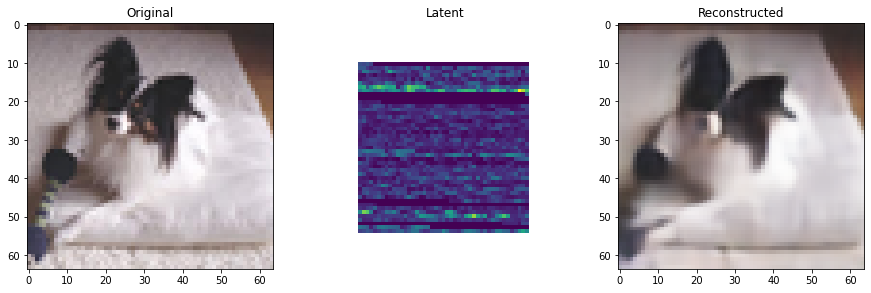

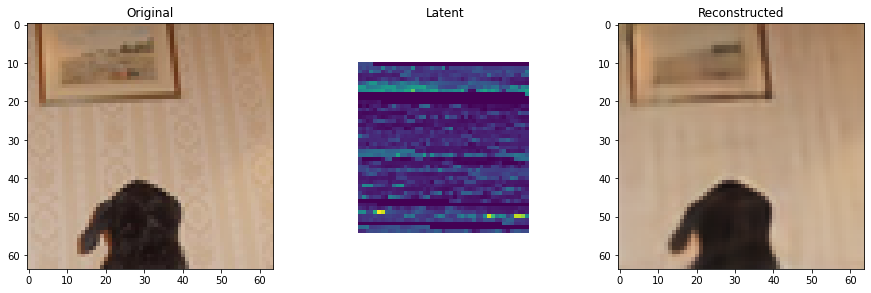

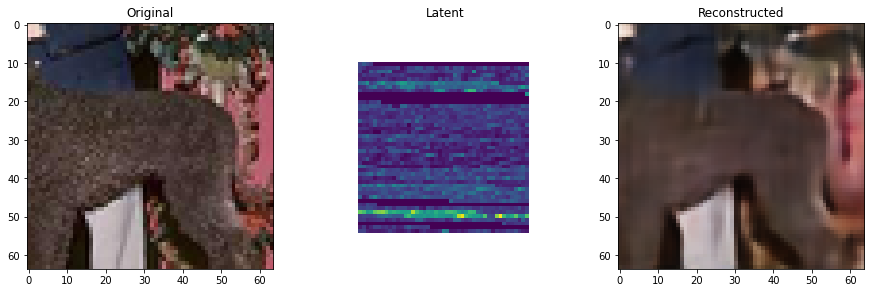

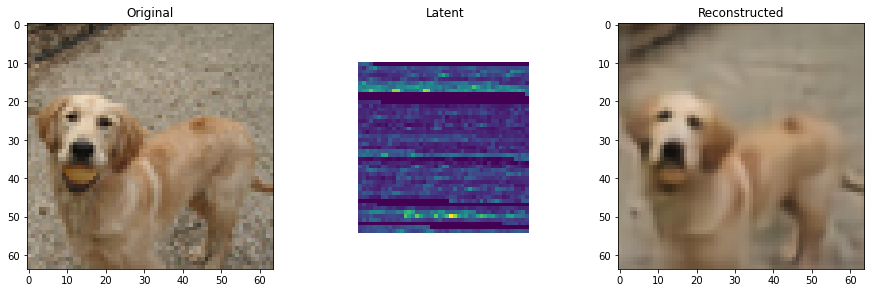

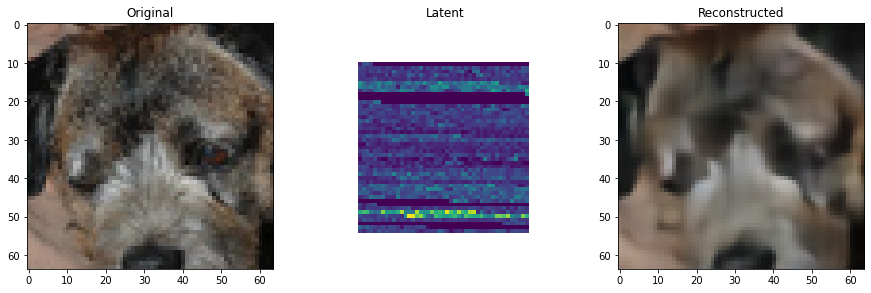

In [15]:
images = next(iter(train_batches))[0]
for i in range(5):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    
    # ORIGINAL IMAGE
    orig = images[i,:,:,:].reshape((-1,64,64,3))
    img = Image.fromarray( (255*orig).astype('uint8').reshape((64,64,3)))
    plt.title('Original')
    plt.imshow(img)

    # LATENT IMAGE
    latent_img = encoder.predict(orig)
    mx = np.max( latent_img[0] )
    mn = np.min( latent_img[0] )
    latent_flat = ((latent_img[0] - mn) * 255/(mx - mn)).flatten(order='F')
    img = Image.fromarray( latent_flat[:2025].astype('uint8').reshape((45,45)), mode='L') 
    plt.subplot(1,3,2)
    plt.title('Latent')
    plt.xlim((-10,55))
    plt.ylim((-10,55))
    plt.axis('off')
    plt.imshow(img)

    # RECONSTRUCTED IMAGE
    decoded_imgs = decoder.predict(latent_img[0].reshape((-1,latentSize[0],latentSize[1],latentSize[2])))
    img = Image.fromarray( (255*decoded_imgs[0]).astype('uint8').reshape((64,64,3)))
    plt.subplot(1,3,3)
    plt.title('Reconstructed')
    plt.imshow(img)
    
    plt.show()

In [16]:
encoder.save('./encoder')
decoder.save('./decoder')
autoencoder.save('./autoencoder')

**Plotting the model loss and how it decreases with respect to epochs**

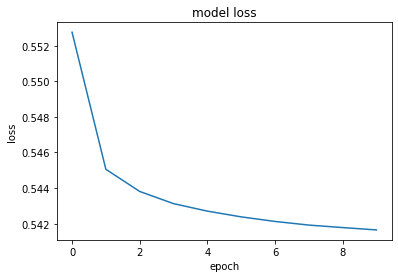

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

**Visualizing the internal representaion of the models**

In [21]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 48)        1344      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 96)        41568     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 192)       166080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 192)         0   

In [23]:
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 48)        1344      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 96)        41568     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 192)       166080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 192)         0     

In [24]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8, 8, 32)]        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 192)         6336      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 192)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 192)       331968    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 32, 32, 192)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 96)        165984    
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 64, 64, 96)        0   